In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
eventsEng = pd.read_json("events_England.json")
eventsEng.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


In [3]:
eventsEng.drop(columns=['eventName','eventSec','id','matchId','matchPeriod',
                        'positions','subEventId','subEventName','tags','teamId'],
              inplace=True)
data = eventsEng[eventsEng['eventId']==8]

In [13]:
passes_players = data.groupby(['playerId']).sum()
passes_players.head()

,eventId
playerId,
0,48
36,7184
38,1792
48,18960
54,17568


In [14]:
passes_players['eventId'] = list(map(lambda a: a//8, passes_players['eventId']))
passes_players.columns = ['total passes']
passes_players.head()

,total passes
playerId,
0,6
36,898
38,224
48,2370
54,2196


In [15]:
# arithmetic mean
sum(passes_players['total passes'])/len(passes_players)

639.4105058365759

In [16]:
result = pd.Series(passes_players['total passes']).value_counts()
result = pd.Series.to_frame(result)
result.columns = ['num of players']
result.head()

,num of players
829,5
6,5
7,5
1,4
4,4


In [17]:
result.sort_index(axis=0, inplace=True)
result.head(15)

,num of players
1,4
2,2
3,1
4,4
5,2
6,5
7,5
8,2
9,1
11,1


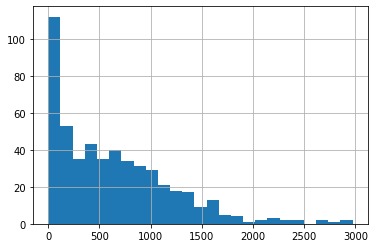

In [18]:
passes_players['total passes'].hist(bins=25)